In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
def get_A(opinions,R):
    '''
    A function to return the average opinion within R of each opinion in a vector of opinions
    '''
    
    num_of_agents = len(opinions)

    # Create a square matrix consisting of the opinions vector repeated num_of_agents times
    opinions_repeated = np.array([opinions]*len(opinions))
    # Create matrix of boolean values indicating which opinions are within R of each opinion
    mask = abs(opinions_repeated - opinions_repeated.T) < R
    
    # Initialise averages matrix
    A = np.zeros(num_of_agents)

    # Loop over agents
    for i in range(num_of_agents):
        # Get average of opinions within R of opinion
        A[i] = np.mean(opinions[mask[i,:]])
        # print(A[i])
    
    return(A)

In [ ]:
# Initialise parameters:
num_of_agents = 1000 # number of agents
Timesteps = 500 # timesteps
R = 0.1 # confidence bound
shocks_dev_c = 0.03 # standard deviation for communal shocks

In [4]:
opinions = np.random.rand(num_of_agents) # init all agents to [0,1]

In [5]:
# Running model

# Sort opinions (only for nicer plotting - omit this step in future models)
opinions.sort()

# Set up random number generators
communal_shocks = stats.truncnorm(-1/shocks_dev_c, 1/shocks_dev_c, loc=0, scale=shocks_dev_c)

# Initialising matrix of opinions over time
opinions_over_time = np.zeros((Timesteps, num_of_agents))
opinions_over_time[0,:] = opinions
for t in range(Timesteps-1):
    opinions_over_time[t+1,:] = get_A(opinions_over_time[t,:], R) + communal_shocks.rvs()
    opinions_over_time[t+1,:] = np.maximum(np.minimum(opinions_over_time[t+1,:],1),0)
    


opinions_over_time

KeyboardInterrupt: 

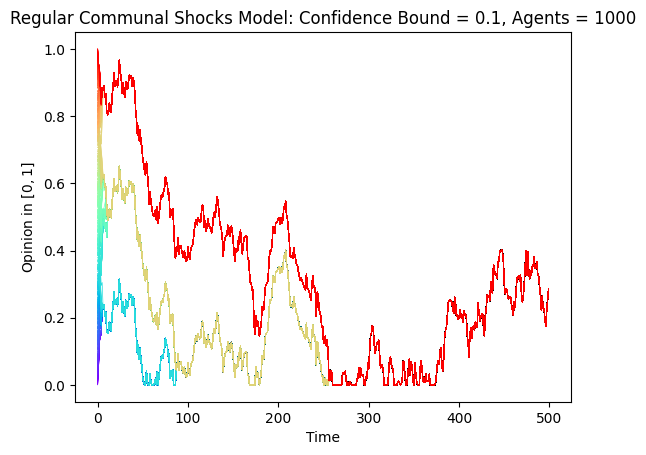

In [ ]:
colours = plt.cm.rainbow(np.linspace(0,1,num_of_agents))

for i in range(num_of_agents):
    plt.plot(opinions_over_time[:,i], color=colours[i], linewidth=0.5)
plt.title(f'Regular Communal Shocks Model: Confidence Bound = {R}, Agents = {num_of_agents}')
plt.xlabel('Time')
plt.ylabel('Opinion in $[0,1]$')
plt.show()

In [9]:
# Initialise parameters:
num_of_agents = 100 # number of agents
Timesteps = 10000 # timesteps
R = 0.1 # confidence bound
shocks_dev_c = 0.005 # standard deviation for communal shocks
shocks_dev_i = 0.03 # standard deviation for individual shocks

In [10]:
# Running model

# Starting opinions:
opinions = np.random.rand(num_of_agents) # init all agents to [0,1]

# Sort opinions (only for nicer plotting - omit this step in future models)
opinions.sort()

# Set up random number generators
communal_shocks = stats.truncnorm(-1/shocks_dev_c, 1/shocks_dev_c, loc=0, scale=shocks_dev_c)
individual_shocks = stats.truncnorm(-1/shocks_dev_i, 1/shocks_dev_i, loc=0, scale=shocks_dev_i)

# Initialising matrix of opinions over time
opinions_over_time = np.zeros((Timesteps, num_of_agents))
opinions_over_time[0,:] = opinions
for t in range(Timesteps-1):
    opinions_over_time[t+1,:] = get_A(opinions_over_time[t,:], R) + communal_shocks.rvs() + individual_shocks.rvs(size=num_of_agents)
    opinions_over_time[t+1,:] = np.maximum(np.minimum(opinions_over_time[t+1,:],1),0)
    


opinions_over_time

array([[0.01351235, 0.02689059, 0.04478162, ..., 0.99012992, 0.99399794,
        0.99746202],
       [0.07209244, 0.07889985, 0.10163153, ..., 0.94633128, 0.97750344,
        1.        ],
       [0.13389173, 0.13678853, 0.13621835, ..., 0.96454026, 0.90284712,
        0.95208405],
       ...,
       [0.96082749, 0.94826129, 0.8699107 , ..., 0.95365925, 0.91723997,
        0.90436502],
       [0.97777729, 0.93165169, 0.96276448, ..., 0.96823089, 0.922004  ,
        0.98049633],
       [0.92801158, 0.94606267, 0.91436364, ..., 0.92023363, 0.92802182,
        0.96916155]], shape=(10000, 100))

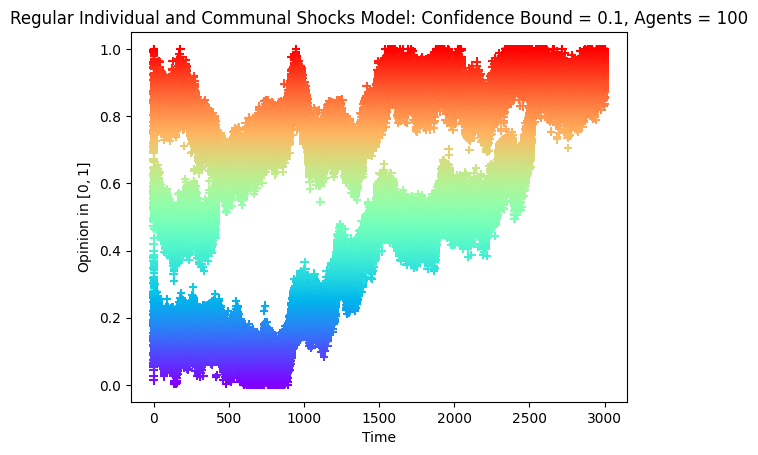

In [ ]:
plt.scatter(np.array([range(Timesteps)]*num_of_agents).T, opinions_over_time, c=opinions_over_time, cmap='rainbow', marker='+')
plt.title(f'Regular Individual and Communal Shocks Model: Confidence Bound = {R}, Agents = {num_of_agents}')
plt.xlabel('Time')
plt.ylabel('Opinion in $[0,1]$')
plt.show()

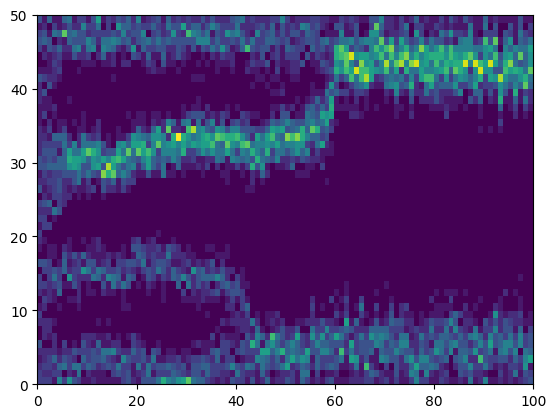

In [608]:
bins = 50
histvals = np.zeros([Timesteps,bins])
for t in range(Timesteps):
    histvals[t,:], _ = np.histogram(opinions_over_time[t,:],bins=bins)
plt.pcolor(histvals.T)

We applied a random normally distributed shift to the entire population at each step. We found that, after forming, each cluster shifts in the same way interacting. This is uninteresting for the most part. However, the most extreme clusters can end up joining with the next most extreme if they end up hitting a wall and therefore shifting less than the next most extreme.